# Poměrová data ve formě Jupyter notebooku – Bc. Adéla Leppeltová
***

## Výzkumné otázky
1. Liší se zaměstnanost absolventa podle oboru?
2. Jaký je vztah mezi oborem studia a výší platu?

## Popis výzkumného souboru
Tento dataset poskytuje informace o absolventech bakalářského studia na vysokých školách v USA a o jejich uplatnění na trhu práce. Obsahuje údaje, jako je pohlaví, věk, obor studia, název školy, zda byli zaměstnáni, plat, GPA a roky praxe.

Dataset obsahuje 700 řádků a 11 sloupců.


[Odkaz na dataset](https://www.kaggle.com/datasets/mahad049/job-placement-dataset)

In [2]:
import numpy as np    
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("job_placement.csv")

print(df.head())
print(df.info())


   id             name  gender  age      degree                  stream  \
0   1         John Doe    Male   25  Bachelor's        Computer Science   
1   2       Jane Smith  Female   24  Bachelor's  Electrical Engineering   
2   3  Michael Johnson    Male   26  Bachelor's  Mechanical Engineering   
3   4      Emily Davis  Female   23  Bachelor's  Information Technology   
4   5      David Brown    Male   24  Bachelor's        Computer Science   

                            college_name placement_status  salary  gpa  \
0                     Harvard University           Placed   60000  3.7   
1  Massachusetts Institute of Technology           Placed   65000  3.6   
2                    Stanford University           Placed   58000  3.8   
3                        Yale University       Not Placed       0  3.5   
4                   Princeton University           Placed   62000  3.9   

   years_of_experience  
0                  2.0  
1                  1.0  
2                  3.0  
3   

In [3]:
# Počet mužů a žen
gender_counts = df['gender'].value_counts()

# Vytvoření tabulky
gender_table = pd.DataFrame({'Pohlaví': gender_counts.index, 'Počet': gender_counts.values})

print(gender_table)



  Pohlaví  Počet
0  Female    366
1    Male    334


## Missing values

In [4]:
missing_values = df.isnull().sum()
print("Chybějící hodnoty:")
print(missing_values)


Chybějící hodnoty:
id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64


## Odstranění duplicit

In [5]:
# Odstranění duplicitních záznamů
dataset = df.drop_duplicates()
print("Počet řádků po odstranění duplicit: ", len(dataset))


Počet řádků po odstranění duplicit:  700


## Kontrola validity dat

In [6]:
# Kontrola validity dat pro proměnnou 'salary'
print("Minimální plat:", dataset['salary'].min())
print("Maximální plat:", dataset['salary'].max())
# Kontrola negativních hodnot
negative_salary = df[df['salary'] < 0]
print("Počet záporných hodnot proměnné 'salary':", len(negative_salary))

# Kontrola validity dat pro proměnnou 'stream'
unique_streams = df['stream'].unique()
print("Hodnoty proměnné 'stream':", unique_streams)

# Kontrola validity dat pro proměnnou 'placement_status'
unique_placement_status = df['placement_status'].unique()
print("Hodnoty proměnné 'placement_status':", unique_placement_status)

Minimální plat: 0
Maximální plat: 68000
Počet záporných hodnot proměnné 'salary': 0
Hodnoty proměnné 'stream': ['Computer Science' 'Electrical Engineering' 'Mechanical Engineering'
 'Information Technology' 'Electronics and Communication']
Hodnoty proměnné 'placement_status': ['Placed' 'Not Placed']


In [7]:
# Základní statistiky
df.describe()

,id,age,salary,gpa,years_of_experience
count,700.00000,700.000000,700.000000,700.000000,699.000000
mean,350.50000,24.411429,52474.285714,3.750429,2.177396
std,202.21688,1.164268,25160.331005,0.121212,0.779393
min,1.00000,23.000000,0.000000,3.400000,1.000000
25%,175.75000,23.000000,61000.000000,3.700000,2.000000
50%,350.50000,24.000000,64000.000000,3.800000,2.000000
75%,525.25000,26.000000,66000.000000,3.900000,3.000000
max,700.00000,26.000000,68000.000000,3.900000,3.000000


## Liší se zaměstnanost absolventa podle oboru?

Poměr zaměstnaných a nezaměstnaných absolventů podle oboru studia:
placement_status               Not Placed    Placed
stream                                             
Computer Science                 0.247664  0.752336
Electrical Engineering           0.196429  0.803571
Electronics and Communication    0.090090  0.909910
Information Technology           0.157895  0.842105
Mechanical Engineering           0.189189  0.810811


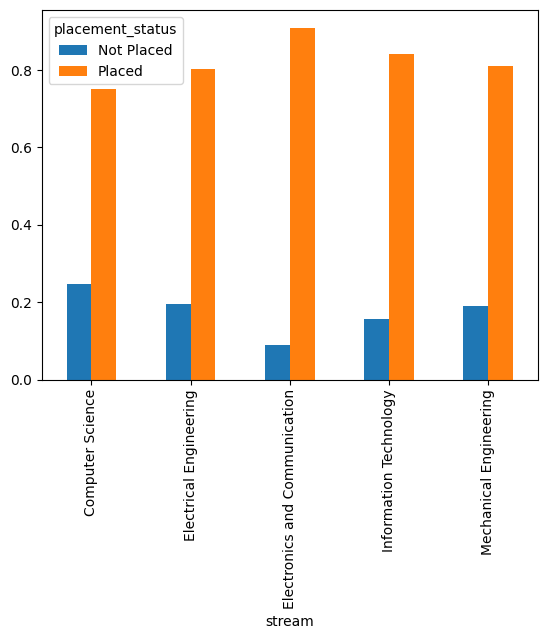

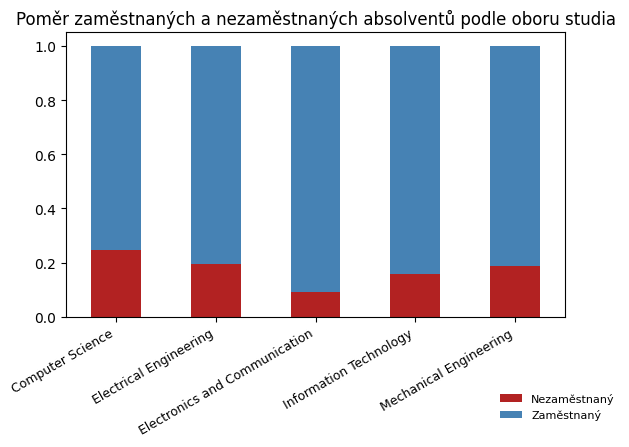

In [8]:
employment_by_major = df.groupby('stream')['placement_status'].value_counts(normalize=True).unstack()
print("Poměr zaměstnaných a nezaměstnaných absolventů podle oboru studia:")
print(employment_by_major)

#Základní graf
employment_by_major.plot(kind='bar' )
plt.show()

#Vylepšení
employment_by_major.plot(kind='bar', stacked=True, color=['firebrick', 'steelblue'] )
plt.title('Poměr zaměstnaných a nezaměstnaných absolventů podle oboru studia')
plt.xlabel('')
plt.ylabel('')
plt.legend(frameon=False, loc='lower left',bbox_to_anchor=(0.85, -0.4), labels=['Nezaměstnaný', 'Zaměstnaný'],prop={'size': 8})
plt.xticks(rotation=30, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

## Jaký je vztah mezi oborem studia a výší platu?

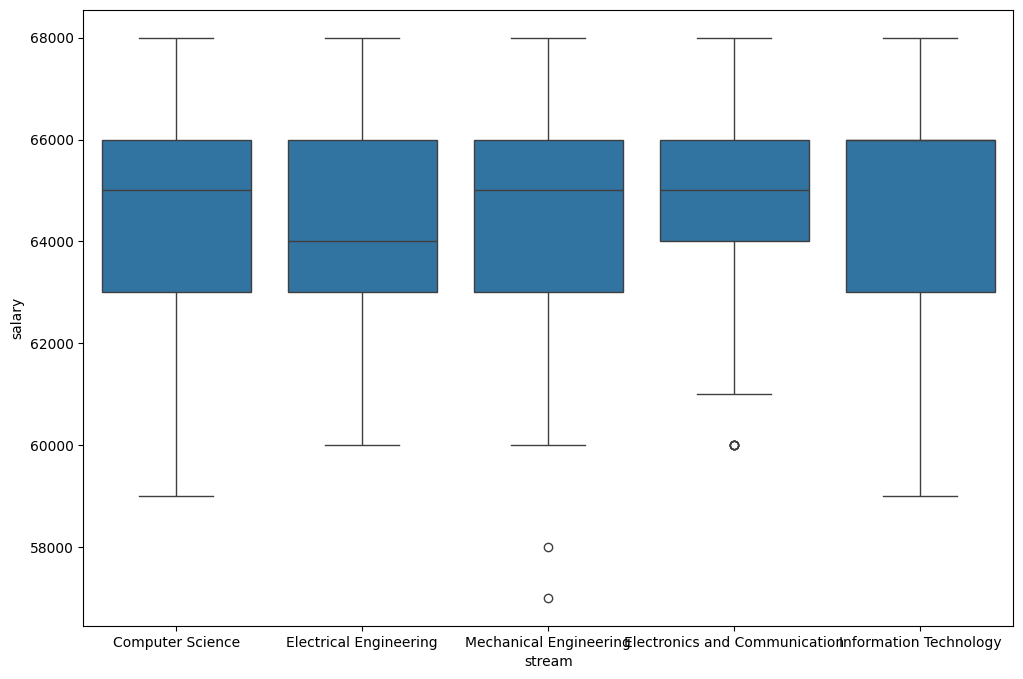

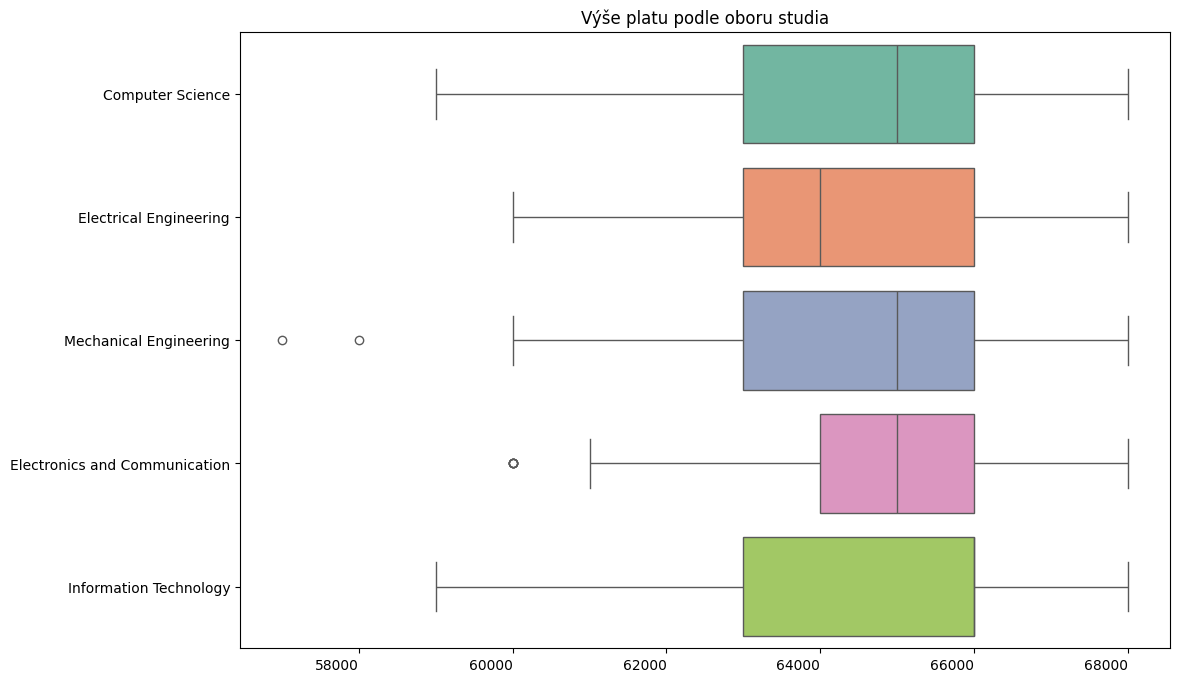

In [9]:
#očištění od nulových platů
df_cleaned = df[df['salary'] != 0]

#Základní graf
plt.figure(figsize=(12, 8))
sns.boxplot(x='stream', y='salary', data=df_cleaned)
plt.show()

#Vylepšení
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary', y='stream', data=df_cleaned, palette='Set2', hue='stream', legend=False)
plt.title('Výše platu podle oboru studia')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, ha='right')
plt.show()

## Podíl mužů a žen podle oboru studia

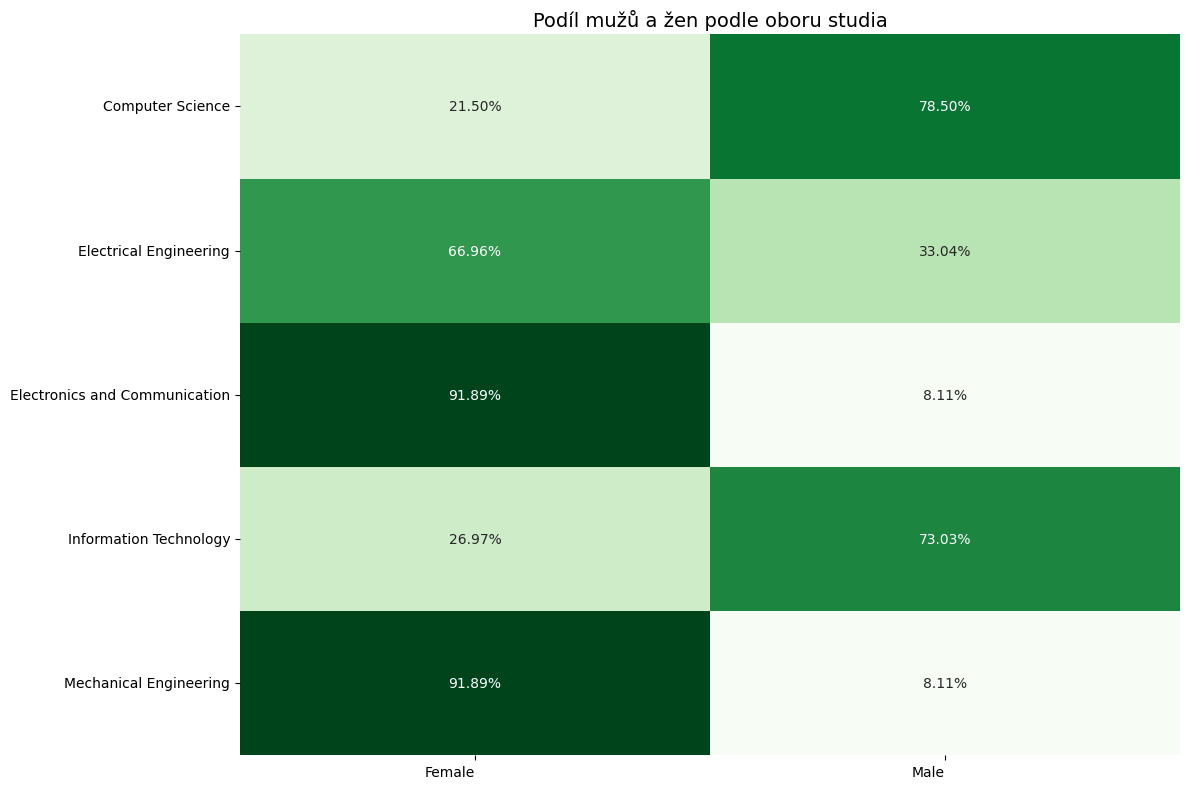

In [10]:
# Počet mužů a žen podle oboru studia
gender_by_major = df.groupby('stream')['gender'].value_counts(normalize=True).unstack()

# Vytvoření heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(gender_by_major, annot=True, cmap='Greens', fmt=".2%", cbar=False, annot_kws={"size": 10})
plt.title('Podíl mužů a žen podle oboru studia', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [13]:
import plotly.graph_objects as go

# Vytvoření histogramu
fig = go.Figure(data=[go.Histogram(x=df['salary'], marker=dict(color='steelblue'))])

# Nastavení os a titulku
fig.update_layout(
    title='Histogram výše platů',
    xaxis_title='Plat',
    yaxis_title='Počet',
    bargap=0.05,  # mezera mezi sloupci histogramu
)

# Zobrazení grafu
fig.show()
